In [10]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
class AntColonyOptimizer:

    def __init__(self, sets_list, ants, evaporation_rate, intensification, alpha=1.0, beta=0.0,
                 beta_evaporation_rate=0, choose_best=0.1, tmax=100):
        self.sets_list = sets_list
        self.ants = ants
        self.evaporation_rate = evaporation_rate
        self.intensification = intensification
        self.alpha = alpha
        self.beta = beta
        self.beta_evaporation_rate = beta_evaporation_rate
        self.choose_best = choose_best
        self.tmax = tmax

        self.n = len(sets_list)
        self.universe_size = len(set([x for y in sets_list for x in y]))

        # self.pheromone_matrix = self.adj_matrix.A1.reshape(self.n, self.n).astype(float)
        self.pheromone_matrix = np.ones((self.n, self.n))
        self.pheromone_matrix[np.eye(self.n) == 1] = 0

        set_lengths = [len(s) for s in sets_list]

        assert len(set_lengths) == self.n

        self.heuristic_matrix = np.array(set_lengths)
        self.heuristic_matrix = np.tile(self.heuristic_matrix, self.n)
        self.heuristic_matrix = self.heuristic_matrix.reshape(self.n, self.n)
        self.heuristic_matrix[np.eye(self.n) == 1] = 0

        self.prob_matrix = None
        self._update_probabilities()

        self.best_series = []
        self.best_solution = None
        self.best_score = self.n + 1

    def _update_probabilities(self):
        self.prob_matrix = (self.pheromone_matrix ** self.alpha) * (self.heuristic_matrix ** self.beta)

    def _chose_next_node(self, curr_node, available_nodes):
        numerator = self.prob_matrix[curr_node, available_nodes]
        denominator = np.sum(numerator)
        probabilities = numerator / denominator
        return np.random.choice(range(len(probabilities)), p=probabilities)

    def _is_valid_solution(self, solution):
        s = [self.sets_list[i] for i in solution]
        flat_set = set([x for y in s for x in y])
        # print(flat_set)
        return len(flat_set) == self.universe_size

    def _evaluate(self, solutions):
        x_coords = None
        y_coords = None
        best_solution = None
        best_score = self.n + 1
        for s in solutions:
            if len(s) < best_score:
                best_score = len(s)
                best_solution = s
                x_coords = []
                y_coords = []
                for i in range(len(s) - 1):
                    x_coords.append(s[i])
                    y_coords.append(s[i + 1])

        return (x_coords, y_coords), best_solution, best_score

    def _evaporation(self):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        self.beta *= (1 - self.beta_evaporation_rate)

    def _intensify(self, coords):
        x = coords[0]
        y = coords[1]
        self.pheromone_matrix[x, y] += self.intensification

    def fit(self):
        for t in range(self.tmax):
            solutions = []
            for ant in range(self.ants):
                solution = []
                available_nodes = list(range(self.n))
                curr_node = available_nodes[np.random.randint(0, len(available_nodes))]

                while True:
                    solution.append(curr_node)
                    available_nodes.remove(curr_node)
                    if self._is_valid_solution(solution):
                        break
                    else:
                        curr_node_idx = self._chose_next_node(curr_node, available_nodes)
                        curr_node = available_nodes[curr_node_idx]

                solutions.append(solution)

            best_solution_coords, best_solution, best_score = self._evaluate(solutions)

            if best_score < self.best_score:
                self.best_score = best_score
                self.best_solution = best_solution

            self.best_series.append(best_score)

            self._evaporation()
            self._intensify(best_solution_coords)
            self._update_probabilities()

            print(f'Iteration {t + 1}/{self.tmax}: Best Score = {best_score}, Global Best Score = {self.best_score}')

        print(f'Best fit: Score = {self.best_score}, Solution = {[self.sets_list[i] for i in self.best_solution]}')
        plt.figure(figsize=(18, 12))
        plt.plot(self.best_series)
        plt.show()


Iteration 1/100: Best Score = 3, Global Best Score = 3
Iteration 2/100: Best Score = 4, Global Best Score = 3
Iteration 3/100: Best Score = 3, Global Best Score = 3
Iteration 4/100: Best Score = 4, Global Best Score = 3
Iteration 5/100: Best Score = 3, Global Best Score = 3
Iteration 6/100: Best Score = 3, Global Best Score = 3
Iteration 7/100: Best Score = 3, Global Best Score = 3
Iteration 8/100: Best Score = 4, Global Best Score = 3
Iteration 9/100: Best Score = 3, Global Best Score = 3
Iteration 10/100: Best Score = 3, Global Best Score = 3
Iteration 11/100: Best Score = 3, Global Best Score = 3
Iteration 12/100: Best Score = 3, Global Best Score = 3
Iteration 13/100: Best Score = 3, Global Best Score = 3
Iteration 14/100: Best Score = 3, Global Best Score = 3
Iteration 15/100: Best Score = 3, Global Best Score = 3
Iteration 16/100: Best Score = 3, Global Best Score = 3
Iteration 17/100: Best Score = 3, Global Best Score = 3
Iteration 18/100: Best Score = 3, Global Best Score = 3
I

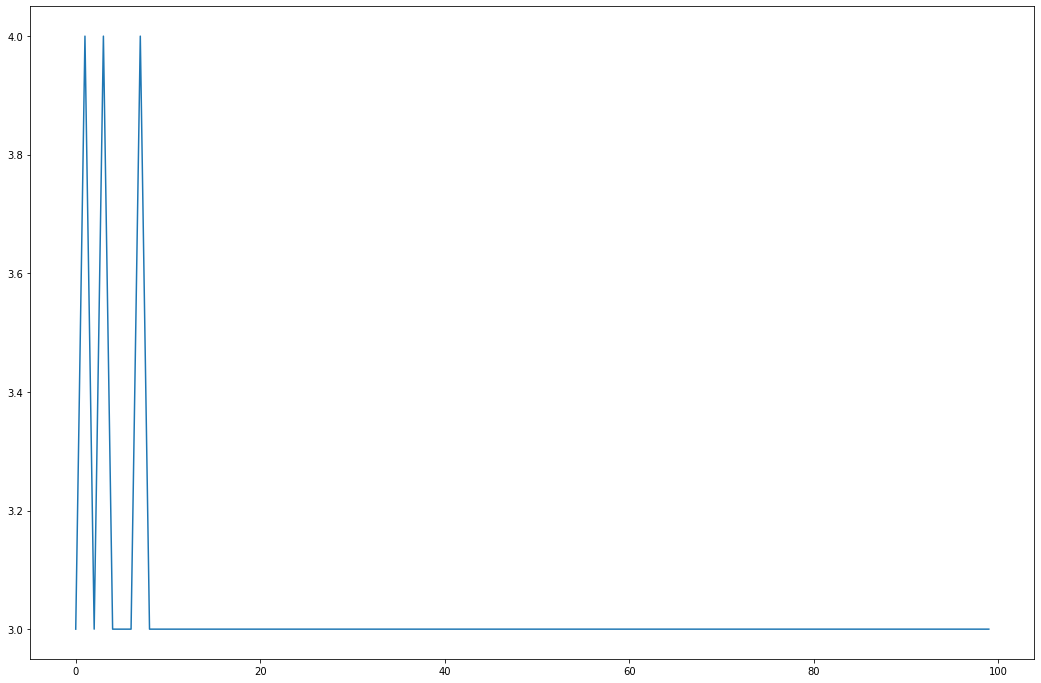

In [12]:
sets = [[1, 2],  [2, 3], [3, 5], [4], [3, 4, 5, 6], [1, 7], [8, 2]]

aco = AntColonyOptimizer(sets, ants=10, evaporation_rate=0.2, intensification=0.4, alpha=1, beta=1)
aco.fit()